# Primeiro Trabalho de Reconhecimento de Padrões

## Questão 1

Obter a função discriminante baseada na regra de Bayes para um problema de classificação com duas classes equiprováveis com densidade probabilidade condicional a posteriori dadas por:

C1 -> gaussiana bidimensional com média [0 0] e matriz de covariância [1 0; 0 1]

C2 -> gaussiana bidimensional com média [4 4] e matriz de covariância [1 0; 0 1]

Obs: Problema de classificação com duas classes e cada classe representada com dois parâmetros.

**Solução:**

A função discriminante é obtida fazendo a diferença das funções probabilidade de cada classe. Como ambas são gaussianas multidimensionais, elas podem ser representadas da seguinte maneira:

$$P(x/\omega_{i}) = \frac{1}{(2\pi)^{\frac{l}{2}\left | \sum _ {i} \right |^{\frac{1}{2}}}}exp\left ( -\frac{1}{2}(x - \mu )^{T} \sum{_{i}^{-1}} (x - \mu )\right )$$

onde $x$ é o vetor formado por $[x_{1} x_{2}]$ e $\mu$ é a matriz de covariância de dimensão $l$x$l$ das classes.

Quando a diferença entre as funções probabilidade de cada classe for zero, pode se obter a função discriminante correspondente. Ou seja:

$$P(x/\omega_{1}) - P(x/\omega_{2}) = 0$$

Fazendo as devidas substituições, a equação pode ser reduzida para:

$$x_{1}^{2} + x_{2}^{2} -(x_{1} - 4)^{2} - (x_{2} - 4)^{2} = 0$$

Desse modo, a função discriminante será:

$$-8x_{1} - 8x_{2} + 32 = 0$$







## Questão 2


Gerar 1000 eventos para cada classe e plota-las juntamente com a superfície de separação. Comente sobre a distribuição das classes no espaço e sobre a forma da superfície de separação.

**Solução:**

In [0]:
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

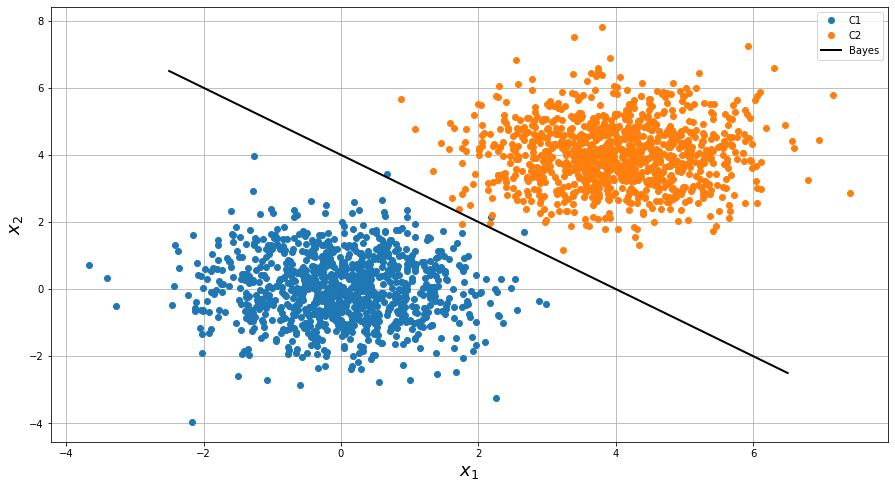

In [76]:
m1 = [0,0]             #Média da classe 1.
s1 = [[1,0],[0,1]]     #Matriz de covariância da classe 1.

m2 = [4,4]             #Média da classe 2.
s2 = [[1,0],[0,1]]     #Matriz de covariância da classe 2.

c1 = np.random.multivariate_normal(m1, s1, 1000)    #Função para gerar eventos da classe 1.
c2 = np.random.multivariate_normal(m2, s2, 1000)    #Função para gerar eventos da classe 2.

x1 = np.linspace(-2.5,6.5,100)    
x2 = -x1 + 4           #Função discriminante baseada na regra de Bayes.

#Plot das classes e da superfície de separação:
plt.figure(figsize = (15,8))
plt.plot(c1[:,0],c1[:,1],'o')
plt.plot(c2[:,0],c2[:,1],'o')
plt.plot(x1, x2, 'k',linewidth=2)
plt.legend(['C1','C2','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

## Questão 3

Calcule a probabilidade de erro teórica.

**Solução:**

O erro teórico de cada classe é calculado a partir das equações a seguir:

$$e_{1} = \int_{-\infty }^{\infty}{\int_{-\infty}^{x_{0}}{f_{x_{1}x_{2}}(x_{1},x_{2})dx_{1}dx_{2}}}$$

$$e_{1} = \int_{-\infty }^{\infty}{\int_{-\infty}^{x_{0}}{f_{x_{1}x_{2}}(x_{1},x_{2})dx_{1}dx_{2}}}$$


onde $x_{0}$ é a função discriminante, $f_{x_{1}x_{2}}(x_{1},x_{2})$ e $f_{x_{1}x_{2}}(x_{1},x_{2})$ correspondem às funções densidade de probabilidade das classes 1 e 2, respectivamente. 

Substituindo os dados, obtém-se:

$$e_{1} = \int_{-\infty }^{\infty}{\int_{-\infty}^{-x_{2}+4}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}^{2}+x_{2}^{2})}{2}} dx_{1}dx_{2}}}$$

$$e_{2} = \int_{-\infty }^{\infty}{\int_{-x{2}+4}^{\infty}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}-4)^{2}-(x_{2}-4)^{2}}{2}} dx_{1}dx_{2}}}$$

Para classes equiprováveis, a probabilidade de erro pode ser calculada a partir da média dos erros em cada classe. Desse modo:

$$P_{e} = \frac{e_{1}+e_{2}}{2}$$

## Questão 4

Estime a probabilidade de erro teórica através do conjunto de dados gerados no item 2.

**Solução:**

A probabilidade de erro de cada classe, assim como a probabilidade de erro teórica para os conjuntos de dados gerados anteriomente é calculada a seguir:

In [77]:
p1 = []
p2 = []

#Teste do limiar de Bayes:
for i in range(1000):
  p1.append(np.sum(np.sum(c1[i,:])>4))
  p2.append(np.sum(np.sum(c2[i,:])<4))

#Cálculo do erro para cada classe:
e1 = np.sum(p1)/len(c1)
e2 = np.sum(p2)/len(c2)

#Cálculo da probabilidade de erro:
pe = (e1 + e2)/2

print("Erro do conjunto de dados C1: {:.2f}" .format(100*e1) + "%.")
print("Erro do conjunto de dados C2: {:.2f}" .format(100*e2) + "%.")
print("Probabilidade de erro: {:.2f}".format(100*pe) + "%.")

Erro do conjunto de dados C1: 0.30%.
Erro do conjunto de dados C2: 0.10%.
Probabilidade de erro: 0.20%.


## Questão 5

Gere novos dados das classes C1 e C2 (1000 para cada classe) para serem utilizados como conjunto de teste para avaliação do desempenho dos próximos classificadores.

**Solução:**

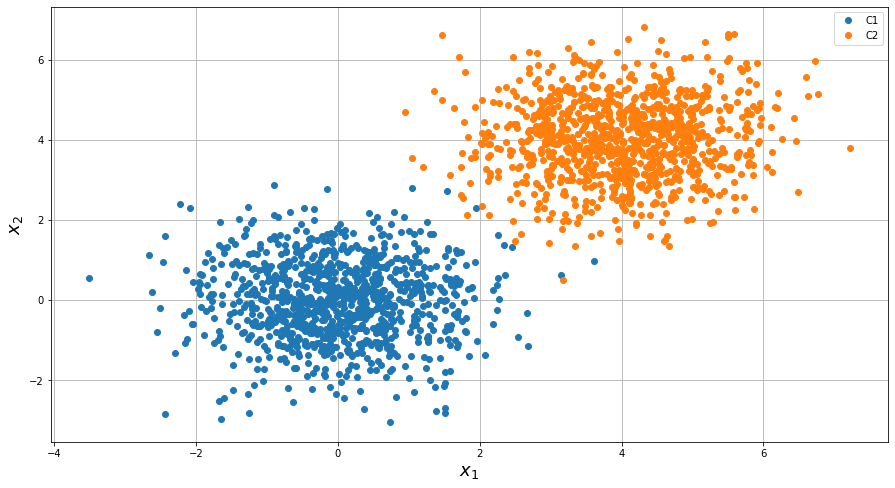

In [78]:
m1 = [0,0]              #Média da classe 1.
s1 = [[1,0],[0,1]]      #Matriz de covariância da classe 1.

m2 = [4,4]              #Média da classe 2.
s2 = [[1,0],[0,1]]      #Matriz de covariância da classe 2.

c1_teste = np.random.multivariate_normal(m1, s1, 1000)     #Função para gerar dados do conjunto de teste da classe 1.
c2_teste = np.random.multivariate_normal(m2, s2, 1000)     #Função para gerar dados do conjunto de teste da classe 1.

#Plot dos conjuntos de teste gerados:
plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.legend(['C1','C2'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

## Questão 6

Projete um classificador baseado na distância Euclidiana entre as médias das classes (médias estimadas no conjunto de treinamento) e ache a função discriminante para este caso e a probabilidade de erro (conjunto de teste). Comente sobre o resultado obtido.

**Solução:**

Para se obter a função discriminante de um classificador baseado na diastância Euclidiana, primeiramente, calcula-se o valor da média aritmética dos dados de teste para cada uma das classes:

In [79]:
#Cálculo da média de cada classe:
m1_teste = np.array([np.mean(c1_teste[:,0]), np.mean(c1_teste[:,1])])
m2_teste = np.array([np.mean(c2_teste[:,0]), np.mean(c2_teste[:,1])])

print("Média dos dados de teste da classe 1: ", m1_teste)
print("Média dos dados de teste da classe 2: ", m2_teste)

Média dos dados de teste da classe 1:  [-0.00944312 -0.01362989]
Média dos dados de teste da classe 2:  [3.9911817  4.02933738]


Com os valores calculados, obtém-se a reta $r_{m}$ que liga os pontos médios das classes. Sabe-se que a equação linear $r_{s}$ que descreve a função discriminante é perpendicular a $r_{m}$, portanto:

$$a_{m}.a_{s} = -1$$

onde $a_{m}$ e $a_{s}$ são os coeficientes angulares das retas $r_{m}$ e $r_{s}$, respectivamente. Como o coeficiente angular de uma reta é igual à tangente do ângulo de inclinação da mesma, calcula-se $a_{m}$ da seguinte maneira: 

$$a_{m} = \frac{\Delta x_{2}}{\Delta x_{1}}$$

Assim,

$$a_{s} = -a_{m}$$

In [80]:
#Cálculo do coeficiente angular:
a_m = (m2_teste[1]-m1_teste[1])/(m2_teste[0]-m1_teste[0])
a_s = -a_m

print("Coeficiente angular da reta rs = ", a_s)

Coeficiente angular da reta rs =  -1.010583960890771


Como a reta $r_{s}$ passa pelo ponto médio de $r_{m}$, ao calcular os valores $x_{1}$ e $x_{2}$ do mesmo, pode-se obter o coeficente linear da reta a partir da seguinte relação:

$$b_{s} = x_{2} - a_{s}x_{1} $$

Coeficiente linear  =  4.042967278380115


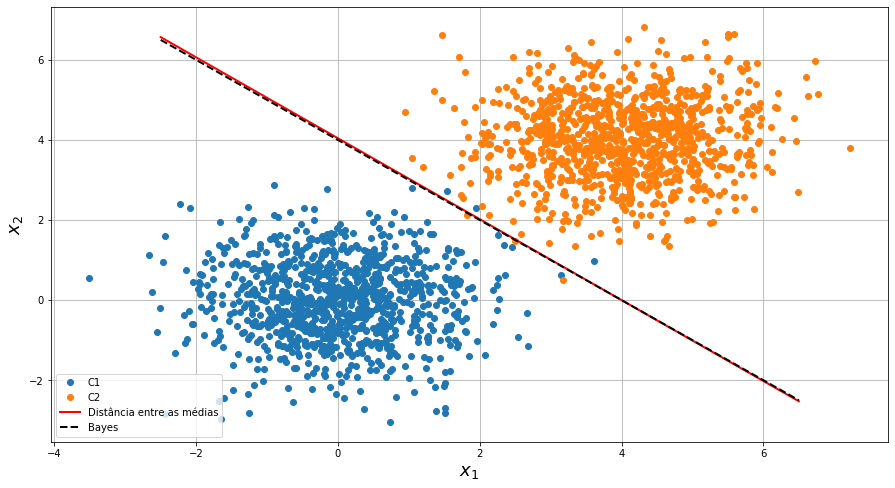

In [81]:
#Ponto médio da reta que liga as médias de cada classe:
hip = np.array(m2_teste-m1_teste)
pmedio = hip/2

#Cálculo do coeficiente linear:
b_s = pmedio[1] - a_s*pmedio[0]

print("Coeficiente linear  = ", b_s)

#Superfície de separação:
x1m = np.linspace(-2.5,6.5,100)
x2m = a_s*x1m+b_s

#Plot das classes e da superfície de separação:
plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(x1m, x2m, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Distância entre as médias','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Observa-se que a função discriminante obtida é bem próxima da calculada utilizando a teoria de Bayes.

A probabilidade de erro é dada por:

In [82]:
p1m = []
p2m = []

#Teste de limiar
for i in range(1000):
  p1m.append(np.sum(np.sum(c1_teste[i,:])>b_s))
  p2m.append(np.sum(np.sum(c2_teste[i,:])<b_s))

#Cálculo do erro para cada conjunto de dados
e1m = np.sum(p1m)/len(c1_teste)
e2m = np.sum(p2m)/len(c2_teste)

#Cálculo da probabilidade de erro:
pem = (e1m + e2m)/2

print("Erro do conjunto de dados C1: {:.2f}" .format(100*e1m) + "%.")
print("Erro do conjunto de dados C2: {:.2f}" .format(100*e2m) + "%.")
print("Probabilidade de erro: {:.2f}".format(100*pem) + "%.")

Erro do conjunto de dados C1: 0.30%.
Erro do conjunto de dados C2: 0.30%.
Probabilidade de erro: 0.30%.


## Questão 7

Projete um classificador de Bayes ingênuo estimando de forma não paramétrica as densidades de probabilidade das classes, utilizando o conjunto de treinamento. Ache a função discriminante para este caso e a probabilidade de erro (conjunto de teste). Comente o resultado obtido.

**Solução:**

Para obter a função de probabilidade das classes de forma não paramétrica, foi utilizada a técnica de estimação de densidade por kernel (KDE, do inglês *kernel density estimation*) em cada parâmetro das duas classes. Para isso, o kernel gaussiano e a largura de banda igual a 1 foram escolhidos.

In [0]:
from sklearn.neighbors.kde import KernelDensity


px1_c1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c1_teste[:,0][:,None])
px2_c1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c1_teste[:,1][:,None])
px1_c2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c2_teste[:,0][:,None])
px2_c2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c2_teste[:,1][:,None])

Como as variáveis são independentes, a relação a seguir pode ser aplicada:

$$f_{1}(x_{1})f_{1}(x_{2}) = f_{2}(x_{1})f_{2}(x_{2})$$
$$f_{1}(x_{1},x_{2}) = f_{2}(x_{1},x_{2})$$

onde $f_{1}$ e $f_{2}$ são as funções probabilidade dos parâmetros das classes 1 e 2 respectivamente. 

Utilizando os resultados anteriores, a probabilidade para cada classe em todos os pontos do espaço formado por $x_{1}$ e  $x_{2}$ foi calculada.

In [0]:
#Definindo o espaço a ser percorrido: 
step = 300
x_axis = np.linspace(min(c1_teste[:,0]), max(c2_teste[:,0]), step)
y_axis = np.linspace(min(c1_teste[:,1]), max(c2_teste[:,1]), step)

p_c1  = np.zeros((step,step))
p_c2  = np.zeros((step,step))

#Cálculo da probabilidade em cada ponto do espaço para ambas as classes:
for j in range(len(y_axis)):
  for i in range(len(x_axis)):
    p_c1[i,j]  = np.exp(px1_c1.score(x_axis[i].reshape(1, -1)))*np.exp(px2_c1.score(y_axis[j].reshape(1, -1)))
    p_c2[i,j]  = np.exp(px1_c2.score(x_axis[i].reshape(1, -1)))*np.exp(px2_c2.score(y_axis[j].reshape(1, -1)))

Como visto na questão 1, a função discriminante pode ser obtida fazendo a diferença das probabilidades de cada classe ser igual a zero. Assim:

$$f_{1}(x_{1},x_{2}) - f_{2}(x_{1},x_{2}) = 0$$

Do resultado da equação anterior, foram obtidos os pontos nos quais a diferença das probabilidades é mínima. Dessa maneira, a função discriminante pôde ser obtida e o resultado se encontra na figura abaixo.

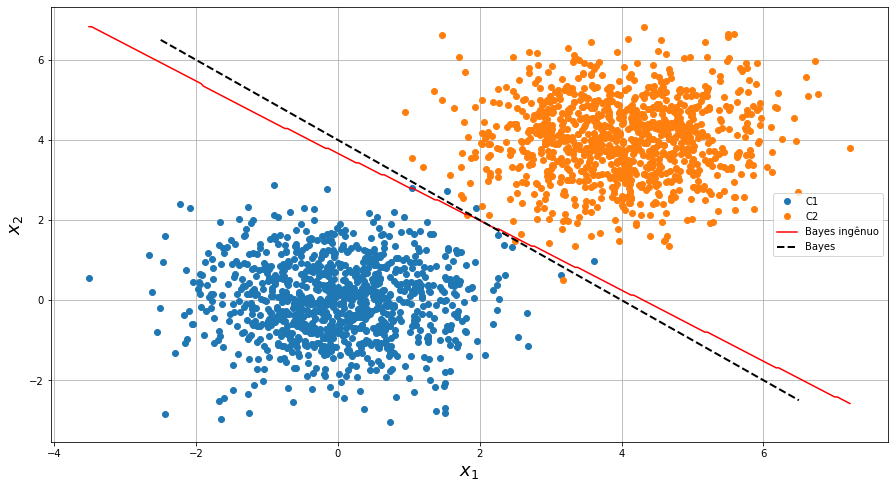

In [89]:
#Diferença das probabilidades das classes:
diffp = np.zeros((step,step))
diffp = abs(p_c1 - p_c2)
vmin = diffp.argmin(axis=0)
pmin = np.zeros((len(diffp),2))
l = 0
for k in vmin:
  pmin[l,:] = x_axis[l], y_axis[k]  #Pontos nos quais a diferença é próxima ou igual a zero.
  l = l+1

#Plot do resultado obtido:
plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(pmin[:,0], pmin[:,1], 'r')
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Bayes ingênuo','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

A probabilidade de erro da classe 1 é de 0,30% e da classe 2 é de 0,10%. A probabilidade total de erro é igual a 0,20%.

## Questão 8

Projete um classificador baseado nos k vizinhos mais próximos utilizando todos os vetores do conjunto de desenvolvimento. Varie o valor de k como 1, 5 e 11. Ache a função discriminante para cada caso e a probabilidade de erro (conjunto de teste). Comente o resultado obtido.

**Solução:**

O método desenvolvido para o cálculo da função discriminante dos $N$ vizinhos mais próximos tem como parâmetros as classes utilizadas, o número $k$ de vizinhos desejados para o cálculo e a resolução do *grid*. O mesmo calcula a distância de cada ponto do *grid* até os eventos de cada classe e salva apenas as $N$ menores distâncias. Ao final, os pontos correspondentes à função discriminante são retornadas.

In [0]:
def knn_sepsurface(train1, train2, k, step):
  x_axis = np.linspace(min(train1[:,0]), max(train2[:,0]), step)
  y_axis = np.linspace(min(train1[:,1]), max(train2[:,1]), step)

  vdist1 = np.zeros((step,len(train1)))
  vdist2 = np.zeros((step,len(train2)))

  min_dist1 = [] 
  min_dist2 = []

  for j in range(len(y_axis)):
    for i in range(len(x_axis)):
      vdist1         = np.sort(np.sqrt((train1[:,0]-x_axis[i])**2 + (train1[:,1]-y_axis[j])**2))
      vdist2         = np.sort(np.sqrt((train2[:,0]-x_axis[i])**2 + (train2[:,1]-y_axis[j])**2))
      min_dist1.append(vdist1[0:k])
      min_dist2.append(vdist2[0:k])

  vdif  = abs(np.sum(np.array(min_dist1),axis=1) - np.sum(np.array(min_dist2),axis=1)).reshape(step,step)
  vmin = vdif.argmin(axis=0)
  pknn = np.zeros((len(vdif),2))
  l = 0
  for k in vmin:
    pknn[l,:] = x_axis[k], y_axis[l]
    l = l+1

  return pknn

Para $k = 1$ a função discriminante recorta os pontos pertos do limite de cada classe, não sendo possível fazer sua generalização.

A probabilidade de erro da classe 1 é de 0,40% e da classe 2 é de 0,10%. A probabilidade total de erro é igual a 0,25%.

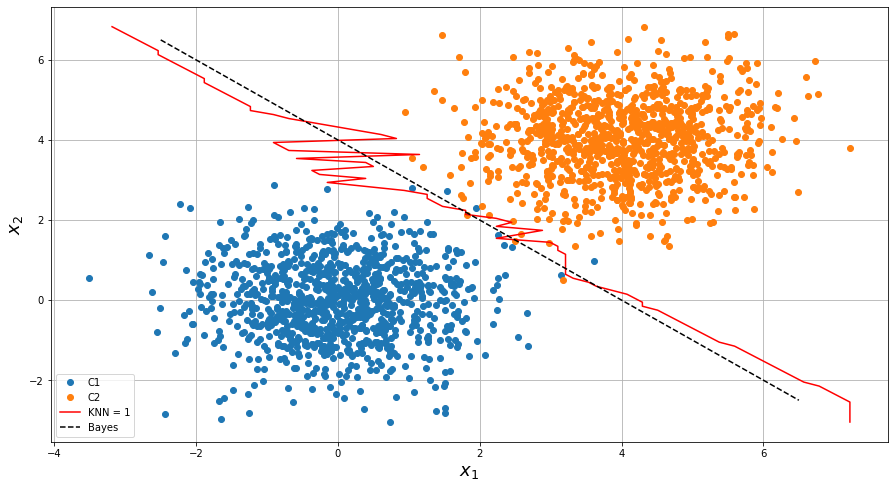

In [92]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 1, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 1','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Já para $k = 5$, a função se adapta menos aos pontos limites sendo possível ainda haver alguns poucos recortes. Nesse caso, a generalização se torna menos complexa comparada ao resultado anterior.

A probabilidade de erro da classe 1 é de 0,50% e da classe 2 é de 0,10%. A probabilidade total de erro é igual a 0,30%.

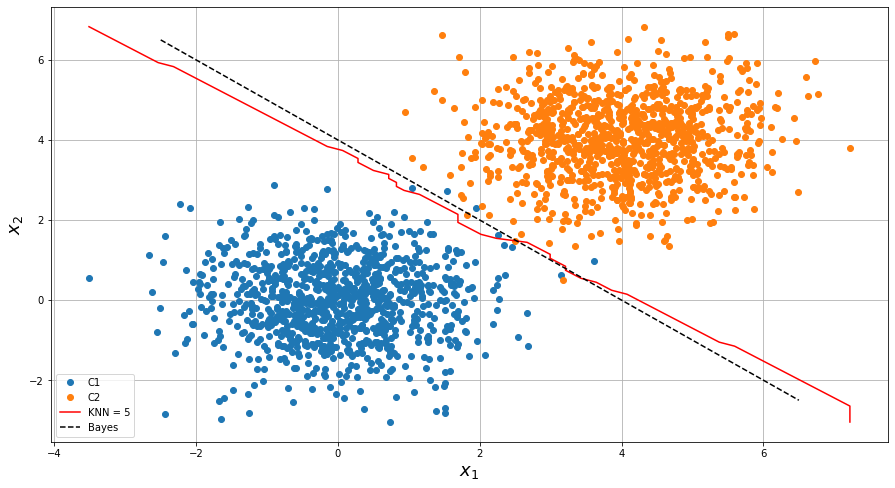

In [93]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 5, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 5','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Utilizando $k = 11$ observa-se que a função discriminante possui comportamento mais linear. Desse modo, quanto mais vizinhos forem utilizados no cálculo, mais próximo da função ótima o resultado se encontra.

A probabilidade de erro da classe 1 é de 0,40% e da classe 2 é de 0,20%. A probabilidade total de erro é igual a 0,30%.

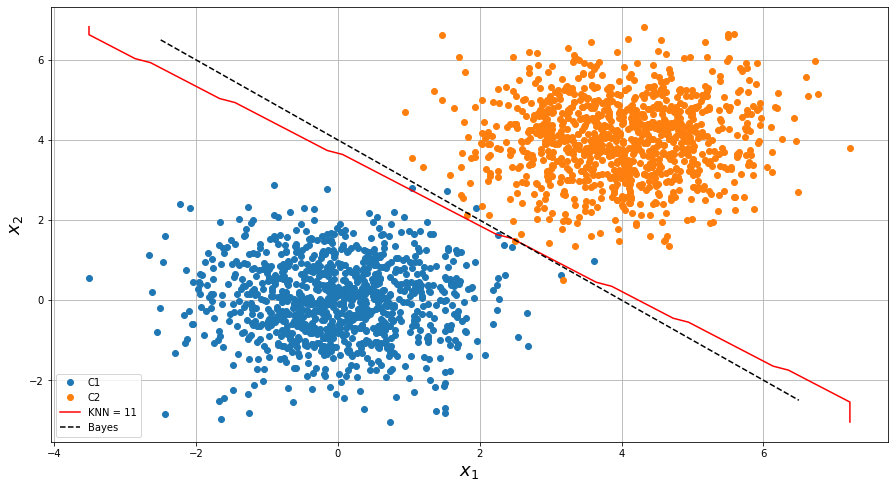

In [94]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 11, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 11','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

## Questão 9

Mude as classes para:

C1 -> gaussiana bidimensional com média [0 0] e matriz de covariância [1 -0.5; -0.5 1]

C2 -> gaussiana bidimensional com média [3 3] e atriz de covariância [1 -0.5; -0.5 1]

Refaça todos os casos acima estudados para esta nova configuração das classes.

**9.1:**

O cálculo da função discriminante é feita de maneira similar ao desenvolvido na questão 1:

$$P(x/\omega_{1}) - P(x/\omega_{2}) = 0$$

Desse modo, fazendo as substituições necessárias:

$$x_{1}^{2} - x_{1}x_{2} + x_{2}^{2} - x_{1}^{2} -  x_{2}^{2} + x_{1}x_{2} - 3x_{1} - 3x_{2} + 9= 0$$

Desse modo, a função discriminante será:

$$-3x_{1} - 3x_{2} + 9 = 0$$

**9.2:**

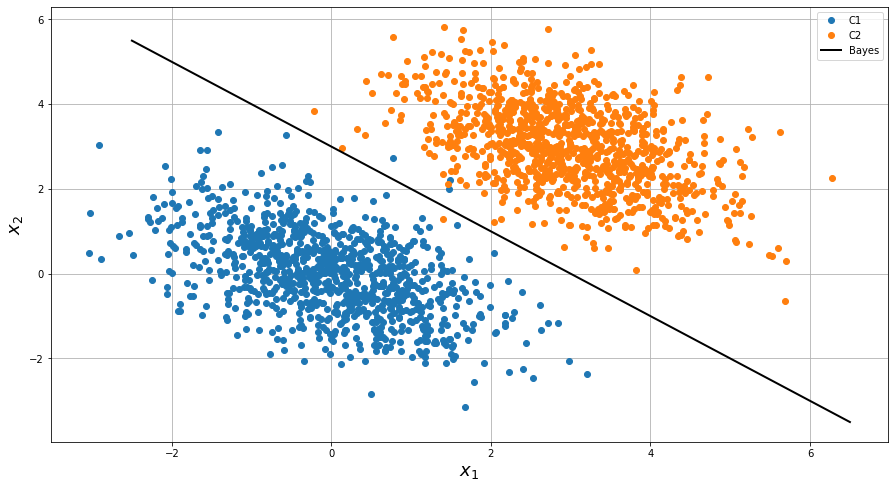

In [97]:
m1 = [0,0]
s1 = [[1,-0.5],[-0.5,1]]

m2 = [3,3]
s2 = [[1,-0.5],[-0.5,1]]

c1 = np.random.multivariate_normal(m1, s1, 1000)
c2 = np.random.multivariate_normal(m2, s2, 1000)

x1 = np.linspace(-2.5,6.5,100)
x2 = -x1 + 3

plt.figure(figsize = (15,8))
plt.plot(c1[:,0],c1[:,1],'o')
plt.plot(c2[:,0],c2[:,1],'o')
plt.plot(x1, x2, 'k',linewidth=2)
plt.legend(['C1','C2','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

**9.3:**

Como mostrado na questão 3 e fazendo as devidas substituições, o erro teórico pode ser calculado a partir de:

$$e_{1} = \int_{-\infty }^{\infty}{\int_{-\infty}^{-x_{2}+3}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}^{2}+x_{2}^{2})}{2}} dx_{1}dx_{2}}}$$

$$e_{2} = \int_{-\infty }^{\infty}{\int_{-x{2}+3}^{\infty}{\frac{1}{\sqrt{2\pi}}e^{\frac{-(x_{1}-3)^{2}-(x_{2}-3)^{2}}{2}} dx_{1}dx_{2}}}$$

Para classes equiprováveis, a probabilidade de erro pode ser calculada a partir da média dos erros em cada classe. Desse modo:

$$P_{e} = \frac{e_{1}+e_{2}}{2}$$

**9.4:**

A probabilidade de erro de cada classe, assim como a probabilidade de erro teórica para os conjuntos de dados gerados anteriomente é:

In [98]:
p1 = []
p2 = []

#Teste do limiar de Bayes:
for i in range(1000):
  p1.append(np.sum(np.sum(c1[i,:])>3))
  p2.append(np.sum(np.sum(c2[i,:])<3))

#Cálculo do erro para cada classe:
e1 = np.sum(p1)/len(c1)
e2 = np.sum(p2)/len(c2)

#Cálculo da probabilidade de erro:
pe = (e1 + e2)/2

print("Erro do conjunto de dados C1: {:.2f}" .format(100*e1) + "%.")
print("Erro do conjunto de dados C2: {:.2f}" .format(100*e2) + "%.")
print("Probabilidade de erro: {:.2f}".format(100*pe) + "%.")

Erro do conjunto de dados C1: 0.30%.
Erro do conjunto de dados C2: 0.10%.
Probabilidade de erro: 0.20%.


**9.5:**

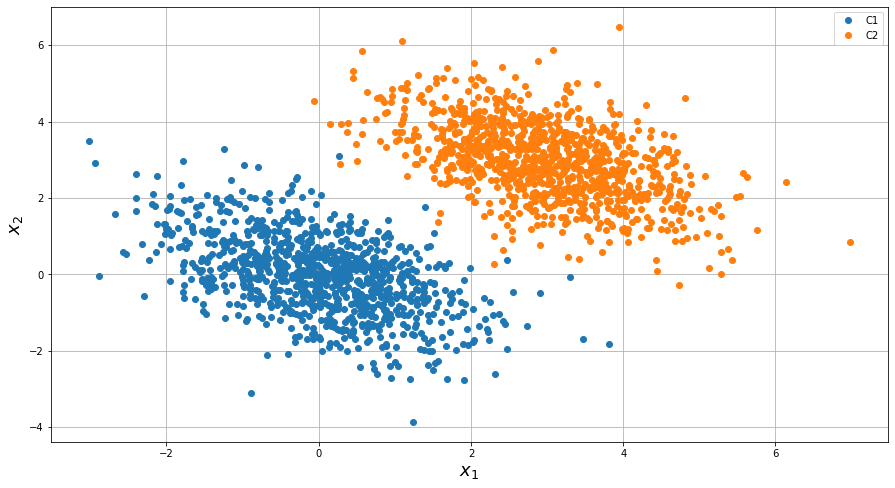

In [99]:
m1 = [0,0]
s1 = [[1,-0.5],[-0.5,1]]

m2 = [3,3]
s2 = [[1,-0.5],[-0.5,1]]

c1_teste = np.random.multivariate_normal(m1, s1, 1000)
c2_teste = np.random.multivariate_normal(m2, s2, 1000)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.legend(['C1','C2'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

**9.6:**

Fazendo os cálculos semelhantes ao da questão 6, obtém-se:

Coeficiente angular =  -1.027479184520618
Coeficiente linear  =  3.009512030457328


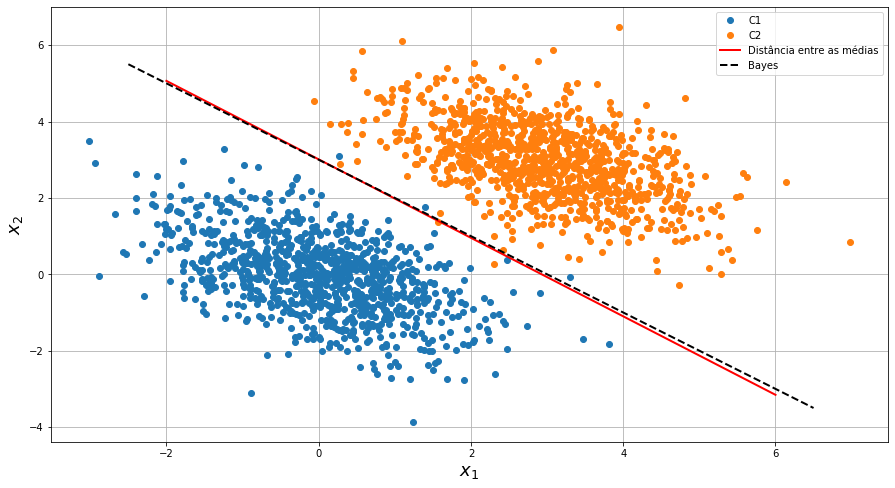

In [101]:
m1_teste = np.array([np.mean(c1_teste[:,0]), np.mean(c1_teste[:,1])])
m2_teste = np.array([np.mean(c2_teste[:,0]), np.mean(c2_teste[:,1])])

a_m = (m2_teste[1]-m1_teste[1])/(m2_teste[0]-m1_teste[0])
a_s  = -a_m

hip = np.array(m2_teste-m1_teste)
pmedio = hip/2

b_s = pmedio[1] - a_s*pmedio[0]

x1m = np.linspace(-2,6,100)
x2m = a_s*x1m+b_s

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(x1m, x2m, 'r',linewidth=2)
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Distância entre as médias','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

print("Coeficiente angular = ", a_s)
print("Coeficiente linear  = ", b_s)

In [102]:
p1m = []
p2m = []

#Teste de limiar
for i in range(1000):
  p1m.append(np.sum(np.sum(c1_teste[i,:])>b_s))
  p2m.append(np.sum(np.sum(c2_teste[i,:])<b_s))

#Cálculo do erro para cada conjunto de dados
e1m = np.sum(p1m)/len(c1_teste)
e2m = np.sum(p2m)/len(c2_teste)

#Cálculo da probabilidade de erro:
pem = (e1m + e2m)/2

print("Erro do conjunto de dados C1: {:.2f}" .format(100*e1m) + "%.")
print("Erro do conjunto de dados C2: {:.2f}" .format(100*e2m) + "%.")
print("Probabilidade de erro: {:.2f}".format(100*pem) + "%.")

Erro do conjunto de dados C1: 0.30%.
Erro do conjunto de dados C2: 0.20%.
Probabilidade de erro: 0.25%.


**9.7:** Utilizando a mesma teoria exposta na questão 7, calcula-se a função discriminante da seguinte maneira:

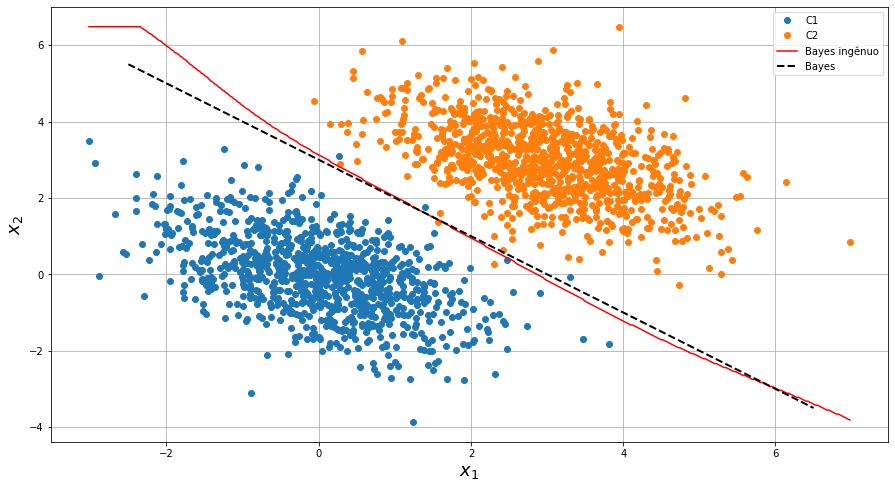

In [108]:
px1_c1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c1_teste[:,0][:,None])
px2_c1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c1_teste[:,1][:,None])
px1_c2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c2_teste[:,0][:,None])
px2_c2 = KernelDensity(kernel='gaussian', bandwidth=1).fit(c2_teste[:,1][:,None])

step = 400
x_axis = np.linspace(min(c1_teste[:,0]), max(c2_teste[:,0]), step)
y_axis = np.linspace(min(c1_teste[:,1]), max(c2_teste[:,1]), step)

p_c1  = np.zeros((step,step))
p_c2  = np.zeros((step,step))
diffp = np.zeros((step,step))

for j in range(len(y_axis)):
  for i in range(len(x_axis)):
    p_c1[i,j]  = np.exp(px1_c1.score(x_axis[i].reshape(1, -1)))*np.exp(px2_c1.score(y_axis[j].reshape(1, -1)))
    p_c2[i,j]  = np.exp(px1_c2.score(x_axis[i].reshape(1, -1)))*np.exp(px2_c2.score(y_axis[j].reshape(1, -1)))
    
    
diffp = abs(p_c1 - p_c2)
vmin = diffp.argmin(axis=0)
pmin = np.zeros((len(diffp),2))
l = 0
for k in vmin:
  pmin[l,:] = x_axis[l], y_axis[k]
  l = l+1

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(pmin[:,0], pmin[:,1], 'r')
plt.plot(x1, x2, '--k',linewidth=2)
plt.legend(['C1','C2','Bayes ingênuo','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

A probabilidade de erro da classe 1 é de 0,3% e da classe 2 é de 0,2%. A probabilidade total de erro é igual a 0,25%.

**9.8:**

Aplicando a função desenvolvida na questão 8 ao novo conjunto de dados, obtém-se:

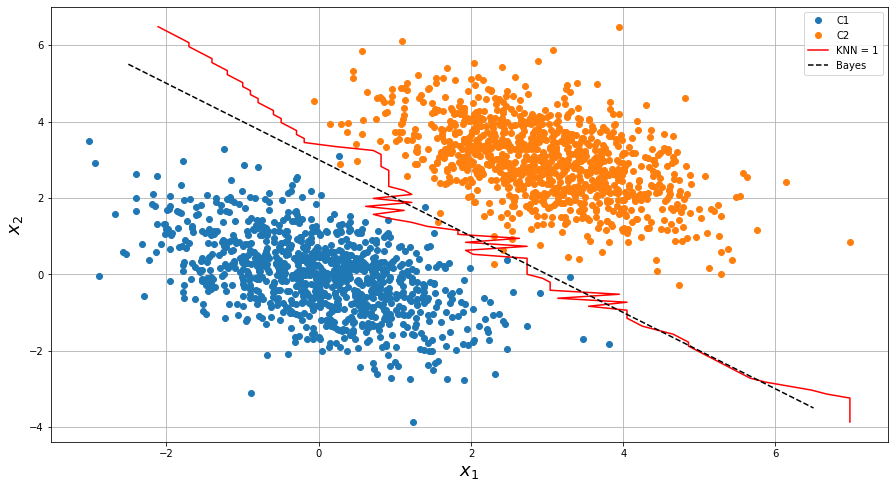

In [105]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 1, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 1','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Para $k = 1$, a probabilidade de erro da classe 1 é de 0,20% e da classe 2 é de 0,10%. A probabilidade total de erro é igual a 0,15%.

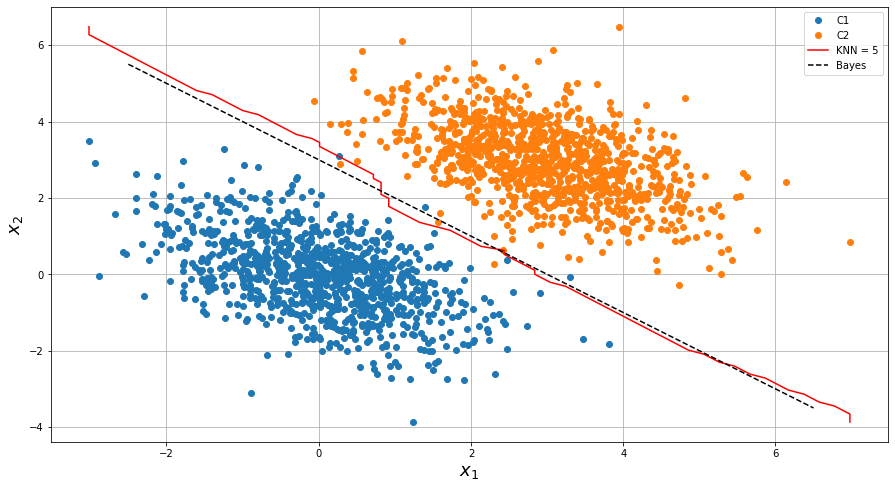

In [106]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 5, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 5','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Para $k = 5$, a probabilidade de erro da classe 1 é de 0,20% e da classe 2 é de 0,10%. A probabilidade total de erro é igual a 0,15%.

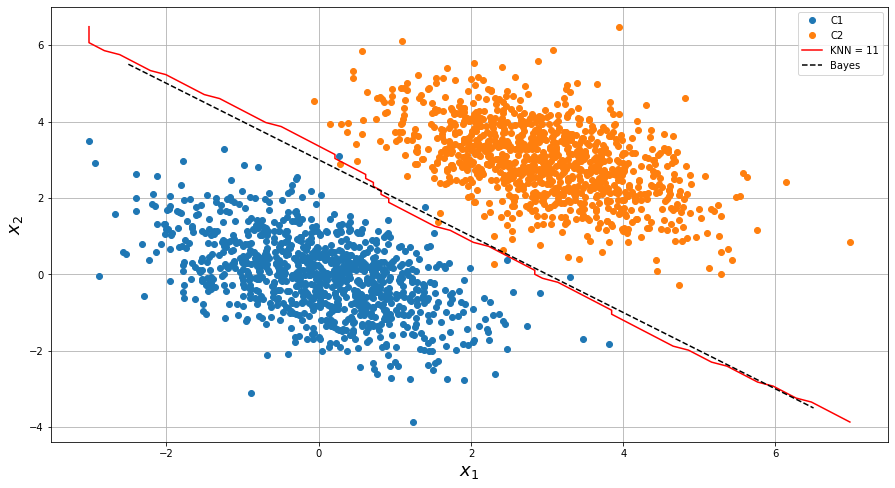

In [107]:
sep_surface = knn_sepsurface(c1_teste, c2_teste, 11, 100)

plt.figure(figsize = (15,8))
plt.plot(c1_teste[:,0],c1_teste[:,1],'o')
plt.plot(c2_teste[:,0],c2_teste[:,1],'o')
plt.plot(sep_surface[:,0], sep_surface[:,1], 'r')
plt.plot(x1, x2, '--k')
plt.legend(['C1','C2','KNN = 11','Bayes'])
plt.xlabel('$x_{1}$',fontsize=18)
plt.ylabel('$x_{2}$',fontsize=18)
plt.grid()

Para $k = 11$, a probabilidade de erro da classe 1 é de 0,30% e da classe 2 é de 0,20%. A probabilidade total de erro é igual a 0,25%.